In [ ]:
# Mounting Google Drive to access dataset and save models
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries from Keras for building the CNN model
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras import optimizers

# Initializing the CNN model
model =Sequential()

# Adding convolutional and max pooling layers
model.add(Convolution2D(16, (3, 3),padding='same', activation='relu', input_shape=(224,224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Convolution2D(32, (3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Convolution2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Convolution2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flattening the output and adding fully connected layers
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.4))

# Adding the output layer with 4 classes using softmax activation
model.add(Dense(4, activation='softmax'))

# Compiling the model using RMSprop optimizer and categorical crossentropy loss
#(learning_rate=0.01)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Displaying the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 28, 28, 64)       

In [ ]:
# Image preprocessing

# Importing ImageDataGenerator for data augmentation
from keras.preprocessing.image import ImageDataGenerator

# Setting up training data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

# Setting up validation data rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# Defining batch size and base directory for dataset
batch_size = 16
base_dir = "//content/drive/MyDrive/Epiderma_Lens/dataset"

# Loading training and validation data
training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

valid_set = valid_datagen.flow_from_directory(base_dir+'/val',
                                              target_size=(224, 224),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

Found 1284 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [ ]:
# Printing found classes and sample counts
class_dict = training_set.class_indices
li = list(class_dict.keys())
print(li)

['Actinic keratosis', 'Atopic Dermatitis', 'Dermatofibroma', 'Melanoma']


In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples
print(train_num)
print(valid_num)

1284
324


In [ ]:
# Setting up model checkpoint to save the best model based on validation accuracy
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/MyDrive/Epiderma_Lens"
checkpoint = ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

# Training the model using the training set and validating on the validation set
#fitting images to CNN
history = model.fit(training_set,
                         steps_per_epoch=80,
                         validation_data=valid_set,
                         epochs=15,
                         validation_steps=20,
                         callbacks=callbacks_list)



Epoch 1/15
80/80 [==============================] - ETA: 0s - loss: 1.3505 - accuracy: 0.3565
Epoch 1: val_accuracy improved from -inf to 0.53750, saving model to /content/drive/MyDrive/Epiderma_Lens
80/80 [==============================] - 1036s 13s/step - loss: 1.3505 - accuracy: 0.3565 - val_loss: 1.0869 - val_accuracy: 0.5375
Epoch 2/15
80/80 [==============================] - ETA: 0s - loss: 1.0916 - accuracy: 0.5126
Epoch 2: val_accuracy did not improve from 0.53750
80/80 [==============================] - 25s 316ms/step - loss: 1.0916 - accuracy: 0.5126 - val_loss: 0.9323 - val_accuracy: 0.5375
Epoch 3/15
80/80 [==============================] - ETA: 0s - loss: 0.9503 - accuracy: 0.5931
Epoch 3: val_accuracy improved from 0.53750 to 0.54375, saving model to /content/drive/MyDrive/Epiderma_Lens
80/80 [==============================] - 25s 315ms/step - loss: 0.9503 - accuracy: 0.5931 - val_loss: 1.0375 - val_accuracy: 0.5437
Epoch 4/15
80/80 [==============================] - ETA:

In [ ]:
# Saving the final model
model.save('/content/drive/MyDrive/Epiderma_Lens/Epiderma_Lens.keras')

In [ ]:
# Printing the current working directory
import os;
print(os.getcwd())

/content


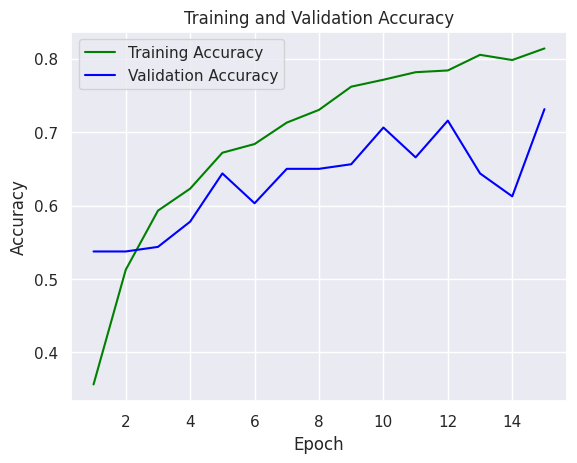

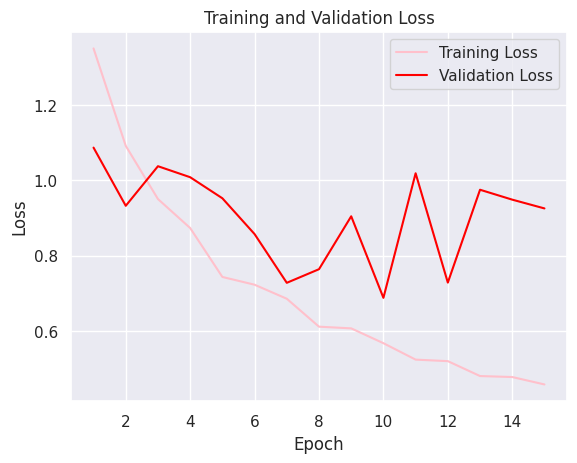

In [ ]:
# Importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Plotting training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()


# Plotting training and validation loss
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:
1/1 [==============================] - 0s 425ms/step


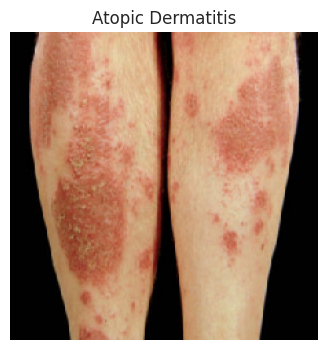

In [ ]:
# Predicting class for a new image
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/Epiderma_Lens/dataset/test/at_dt_1.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]


# Plotting the image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:
1/1 [==============================] - 0s 18ms/step


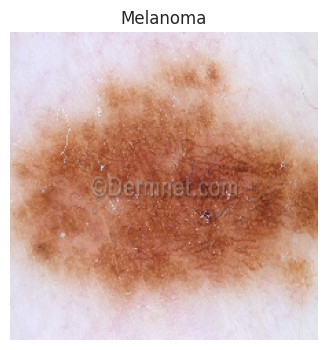

In [ ]:
# Predicting class for another new image
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/Epiderma_Lens/dataset/test/mel_3.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

# Plotting the image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [ ]:
# Resetting validation set and predicting on it
valid_set.reset()

# start to predict
pred = model.predict(valid_set)

21/21 [==============================] - 2s 93ms/step


In [ ]:
# Generating confusion matrix
import tensorflow as tf
import pandas as pd

# using the confusion_matrix function provided by tensorflow to generate confusion matrix
con_mat = tf.math.confusion_matrix(labels=valid_set.classes, predictions=np.argmax(pred, axis=1)).numpy()

# Normalizing the confusion matrix
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

# Converting the normalized confusion matrix to DataFrame
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = valid_set.class_indices.keys(),
                     columns = valid_set.class_indices.keys())

# Displaying the normalized confusion matrix
con_mat_df

,Actinic keratosis,Atopic Dermatitis,Dermatofibroma,Melanoma
Actinic keratosis,0.29,0.34,0.15,0.22
Atopic Dermatitis,0.29,0.33,0.19,0.19
Dermatofibroma,0.34,0.22,0.15,0.29
Melanoma,0.30,0.22,0.16,0.31


In [ ]:
# Generating unnormalized confusion matrix DataFrame

con_mat_df_explain = pd.DataFrame(con_mat,
                     index = valid_set.class_indices.keys(),
                     columns = valid_set.class_indices.keys())

# Displaying the unnormalized confusion matrix
con_mat_df_explain

,Actinic keratosis,Atopic Dermatitis,Dermatofibroma,Melanoma
Actinic keratosis,23,27,12,18
Atopic Dermatitis,24,28,16,16
Dermatofibroma,27,18,12,23
Melanoma,24,18,13,25


In [ ]:
# Generating classification report
import sklearn.metrics

# Generating the clasification report by using the classification_report of sklearn package
report = sklearn.metrics.classification_report(valid_set.classes, np.argmax(pred, axis=1), target_names=valid_set.class_indices.keys())

# Printing the classification report
print(report)

                   precision    recall  f1-score   support

Actinic keratosis       0.23      0.29      0.26        80
Atopic Dermatitis       0.31      0.33      0.32        84
   Dermatofibroma       0.23      0.15      0.18        80
         Melanoma       0.30      0.31      0.31        80

         accuracy                           0.27       324
        macro avg       0.27      0.27      0.27       324
     weighted avg       0.27      0.27      0.27       324

